In [17]:
import requests
import bs4
from bs4 import BeautifulSoup
import numpy as np
import matplotlib.pyplot as plt
import json
import pandas as pd
import time
%matplotlib inline
plt.style.use('bmh')
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

# Salary search

## Websites for scrape

In [18]:
Salary_search = (('Data_analyst',
'http://www.payscale.com/research/AU/Job=Data_Analyst/Salary'), 
                 ('Data_scientist',
'https://www.payscale.com/research/AU/Job=Senior_Data_Analyst/Salary'), 
                 ('Business_intelligence',
'http://www.payscale.com/research/AU/Job=Business_Intelligence_(BI)_Analyst/Salary'), 
                 ('Business_analyst',
'http://www.payscale.com/research/AU/Job=Business_Analyst_(Unspecified_Type)/Salary'),
                 ('Data_architect',
'http://www.payscale.com/research/AU/Job=Data_Architect/Salary'),
                 ('Data_engineer',
'http://www.payscale.com/research/AU/Job=Data_Engineer/Salary'),
                 ('Statistician',
'https://www.payscale.com/research/AU/Job=Statistician/Salary'),
                 ('Research_scientist',
'https://www.payscale.com/research/AU/Job=Research_Scientist/Salary'))
for job in Salary_search:
    print job[0], job[1]

Data_analyst http://www.payscale.com/research/AU/Job=Data_Analyst/Salary
Data_scientist https://www.payscale.com/research/AU/Job=Senior_Data_Analyst/Salary
Business_intelligence http://www.payscale.com/research/AU/Job=Business_Intelligence_(BI)_Analyst/Salary
Business_analyst http://www.payscale.com/research/AU/Job=Business_Analyst_(Unspecified_Type)/Salary
Data_architect http://www.payscale.com/research/AU/Job=Data_Architect/Salary
Data_engineer http://www.payscale.com/research/AU/Job=Data_Engineer/Salary
Statistician https://www.payscale.com/research/AU/Job=Statistician/Salary
Research_scientist https://www.payscale.com/research/AU/Job=Research_Scientist/Salary


## Scraping each webpage and adding html to dictionary

In [20]:
soup_dict = {}

for job in Salary_search:
    driver = webdriver.Chrome('/home/vicki/Desktop/project_4/chromedriver') 

    url = (job[1])

    headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.106 Safari/537.36"}
    page = requests.get(url=url, headers=headers)

    print ('{} {}'.format(page, url))

    soup = BeautifulSoup(page.text, 'html.parser')
    soup_dict[job[0]] = soup
    print('-------------------------------------------------------------------\n'),
print ('done')

<Response [200]> http://www.payscale.com/research/AU/Job=Data_Analyst/Salary
-------------------------------------------------------------------
<Response [200]> https://www.payscale.com/research/AU/Job=Senior_Data_Analyst/Salary
-------------------------------------------------------------------
<Response [200]> http://www.payscale.com/research/AU/Job=Business_Intelligence_(BI)_Analyst/Salary
-------------------------------------------------------------------
<Response [200]> http://www.payscale.com/research/AU/Job=Business_Analyst_(Unspecified_Type)/Salary
-------------------------------------------------------------------
<Response [200]> http://www.payscale.com/research/AU/Job=Data_Architect/Salary
-------------------------------------------------------------------
<Response [200]> http://www.payscale.com/research/AU/Job=Data_Engineer/Salary
-------------------------------------------------------------------
<Response [200]> https://www.payscale.com/research/AU/Job=Statistician/Sal

## Save data to file

In [21]:
# Save
save_soup_dict = soup_dict
np.save('salaries2.npy', save_soup_dict) 

## Clean data

In [65]:
## Load file with dictionary of scraped data 
read_dictionary = np.load('salaries2.npy').item()
soup_dict_2 = (read_dictionary) 

In [66]:
## Set job titles 
job_titles = soup_dict_2.keys()
print job_titles

['Data_architect', 'Business_analyst', 'Business_intelligence', 'Statistician', 'Research_scientist', 'Data_scientist', 'Data_analyst', 'Data_engineer']


## Formating each search into a dataframe

In [67]:
## Run through each entry in dictionary and pull out import salary info
skills_list = []
rates_list = []
job_list = []
#job_titles = ['data_scientist']
idx = 0
for job in job_titles:
    #print job
    for character in soup_dict_2[job].find_all(name='div', attrs={'class':'panel'}):
        for skill in character.find_all(name='div', attrs={'class':'row'}):
            for skill in skill.find_all(name='div', attrs={'class':'col-md-8'}):
                skills_list.append(skill.text.encode('utf8'))
                #print skill.text.encode('utf8')             
        
    for character in soup_dict_2[job].find_all(name='div', attrs={'class':'panel'}):
        for skill in character.find_all(name='div', attrs={'class':'row'}):
            for rate in skill.find_all(name='div', attrs={'class':'col-md-4'}):
                rates_list.append(rate.text.encode('utf8'))
                job_list.append(job)
                #print rate.text.encode('utf8')
    idx += 1

df = pd.DataFrame([job_list,skills_list, rates_list], index=('job','skill','changes')).T
df['job'].unique()

array(['Data_architect', 'Business_analyst', 'Business_intelligence',
       'Statistician', 'Research_scientist', 'Data_scientist',
       'Data_analyst'], dtype=object)

## Set up data frame

In [68]:
df = df.replace('\n','')
df = df.drop_duplicates(subset=['job','skill','changes'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85 entries, 0 to 90
Data columns (total 3 columns):
job        85 non-null object
skill      85 non-null object
changes    85 non-null object
dtypes: object(3)
memory usage: 2.7+ KB


In [69]:
## Load state salary cvs
salary_by_state = pd.read_csv('./salary_by_state.csv')

In [70]:
salary_by_state.iloc[:,1:] = salary_by_state.iloc[:,1:].apply(lambda x: x/100)
salary_by_state

,Unnamed: 0,Business_analyst,Business_intelligence,Research_scientist,Data_analyst,Data_scientist
0,Perth,0.11,NaN,0.07,0.14,NaN
1,Melbourne,0.00,-0.13,-0.09,-0.03,-0.08
2,Sydney,0.03,-0.02,0.02,0.01,0.00
3,Brisbane,-0.05,NaN,-0.02,-0.02,NaN
4,Adelaide,-0.04,NaN,-0.05,-0.06,NaN
5,Canberra,0.00,NaN,NaN,-0.01,NaN


In [71]:
## Save updated salary info
salary_by_state.to_csv('.salary_by_state_info.csv',encoding='utf-8')

In [72]:
## Filter out unnecessary rows
df1 = df[~df['changes'].str.contains('Melbourne')] 

In [73]:
## Clean data
clean = pd.DataFrame(df1)
clean['changes'] = df['changes'].str.replace('$','')

clean = clean.replace({'\n':'','AU':'','$':'',',':'','%':'','\xe2\x96\xb2':'+','\xe2\x96\xbc':'-'}, regex=True)

clean_pivot = clean.pivot(index='job',columns='skill').T.sort_values('Data_analyst',ascending=False).reset_index()

In [74]:
## Drop extra column
clean_pivot = clean_pivot.drop('level_0', axis=1)

In [75]:
## Additional cleaning
clean_pivot.iloc[:,1:] = clean_pivot.iloc[:,1:].replace(np.nan, 0)
clean_pivot.iloc[:,1:] = clean_pivot.iloc[:,1:].astype(int)
clean_pivot.sort_values('Business_analyst', ascending = False)
clean_pivot.iloc[1:,1:] = clean_pivot.iloc[1:,1:] / 100
clean_pivot.sort_values('Business_analyst', ascending = False)

job,skill,Business_analyst,Business_intelligence,Data_analyst,Data_architect,Data_scientist,Research_scientist,Statistician
0,National Average,76000,89000,69000,135000,106000,79000,80000
11,Late-Career,0.6,0,0.46,0,0,0.3,0
15,Experienced,0.17,0.22,0.18,0.17,0.04,0.12,0
16,Mid-Career,0.09,0.04,0.13,-0.02,0.01,-0.01,-0.01
32,Process Improvement,0.02,0,0,0,0,0,0
7,Data Analysis,0.01,0,0,0,-0.08,0.11,0
30,Financial Modeling,0.01,0,0,0,0,0,0
22,Business Process Engineering,0.01,0,0,0,0,0,0
31,Molecular Biology,0,0,0,0,0,-0.05,0
33,Project Management,0,0,0,0,0,0,0


In [76]:
clean_pivot.sort_values('Data_scientist', ascending=False)

job,skill,Business_analyst,Business_intelligence,Data_analyst,Data_architect,Data_scientist,Research_scientist,Statistician
0,National Average,76000,89000,69000,135000,106000,79000,80000
8,R,0,0,0.09,0,0.06,0,0
15,Experienced,0.17,0.22,0.18,0.17,0.04,0.12,0
16,Mid-Career,0.09,0.04,0.13,-0.02,0.01,-0.01,-0.01
28,Database Management & Reporting,-0.03,0,0,0,0,0,0
23,BusinessObjects,0,-0.14,0,0,0,0,0
24,Chemistry,0,0,0,0,0,-0.08,0
25,Clinical Research,0,0,0,0,0,-0.09,0
26,Cognos,0,0.01,0,0,0,0,0
27,Data Warehouse,0,0,0,0.08,0,0,0


In [77]:
clean_pivot.to_csv('.salary_info.csv',encoding='utf-8')

In [78]:
act_salaries = pd.DataFrame(clean_pivot)
clean_salaries = pd.DataFrame(columns=act_salaries.columns)
clean_pivot.columns

Index([u'skill', u'Business_analyst', u'Business_intelligence',
       u'Data_analyst', u'Data_architect', u'Data_scientist',
       u'Research_scientist', u'Statistician'],
      dtype='object', name=u'job')

In [79]:
clean_salaries['skill'] = act_salaries['skill']
clean_salaries['Business_analyst'] = (act_salaries.iloc[1:,1] * act_salaries.iloc[0,1]) + act_salaries.iloc[0,1]
clean_salaries['Business_intelligence'] = (act_salaries.iloc[1:,2] * act_salaries.iloc[0,2]) + act_salaries.iloc[0,2]
clean_salaries['Data_analyst'] = (act_salaries.iloc[1:,3] * act_salaries.iloc[0,3]) + act_salaries.iloc[0,3]

clean_salaries['Data_architect'] = (act_salaries.iloc[1:,4] * act_salaries.iloc[0,4]) + act_salaries.iloc[0,4]
clean_salaries['Data_scientist'] = (act_salaries.iloc[1:,5] * act_salaries.iloc[0,5]) + act_salaries.iloc[0,5]

clean_salaries['Research_scientist'] = (act_salaries.iloc[1:,6] * act_salaries.iloc[0,6]) + act_salaries.iloc[0,6]

clean_salaries.iloc[0] = act_salaries.iloc[0]

-------------------------

In [80]:
clean_salaries.drop('Statistician', inplace=True,axis=1)

In [81]:
clean_salaries['skill'] = clean_salaries['skill'].replace({'SAS (Statistical Analysis System)':'SAS','Windows Operating System General Use':'Windows OS','SAP Business Intelligence (SAP BI)':'SAP BI'})

## Save clean salary info to csv

In [83]:
clean_salaries.to_csv('.clean_salary_info.csv',encoding='utf-8')

In [84]:
def plot_salaries(df, job):
    
    fig,ax = plt.subplots(figsize=(8,5))
    # x start-finish y start-finish
    plt.plot([0, 36], [df[job][0], df[job][0]], 'k-', lw=2)
    df[[job,'skill']].set_index('skill').sort_values(job, ascending=True).plot(legend=False,ax=ax)
    plt.xticks(rotation=45, fontsize=18)
    plt.yticks(fontsize=14)
    plt.xlabel(' ')
    plt.title(str(job),fontsize=24)
    
    props = dict(boxstyle='round', facecolor='lightblue', alpha=0.5)
    
    ax.text(0.05, 0.95, 'Median salary:\n $'+str(df[job][0]), transform=ax.transAxes, fontsize=20,
        verticalalignment='top', bbox=props)
    
    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_horizontalalignment('right')

In [85]:
#plot_salaries(clean_salaries, 'Data_scientist')

#clean_salaries[['Data_scientist','skill']]#.set_index('skill').sort_values(job, ascending=True).plot(legend=False,ax=ax)

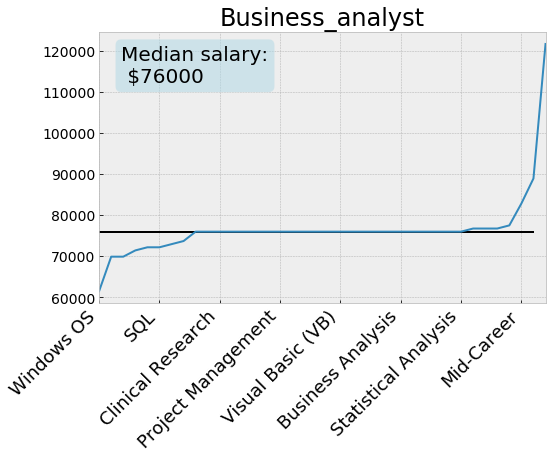

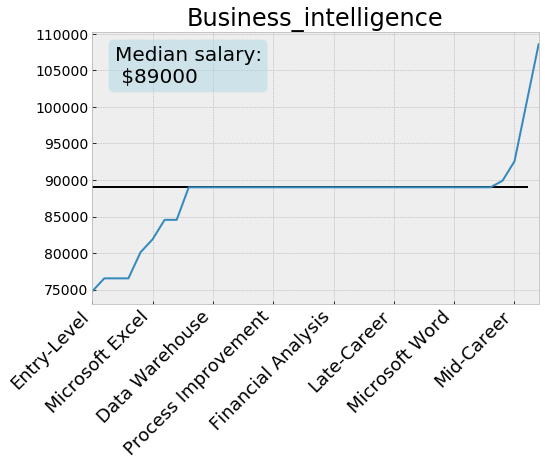

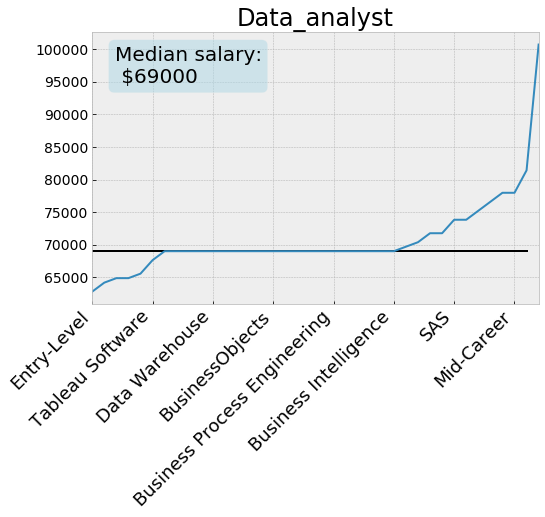

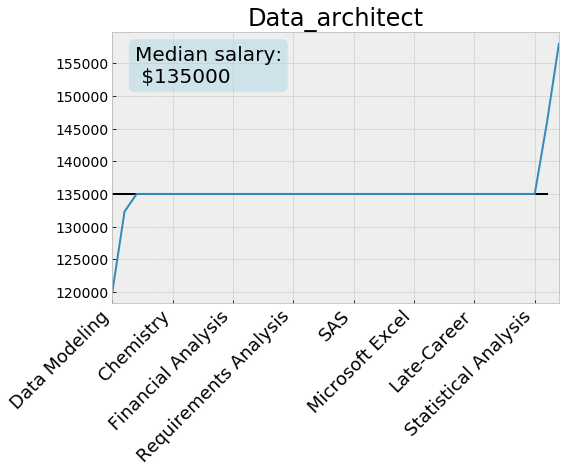

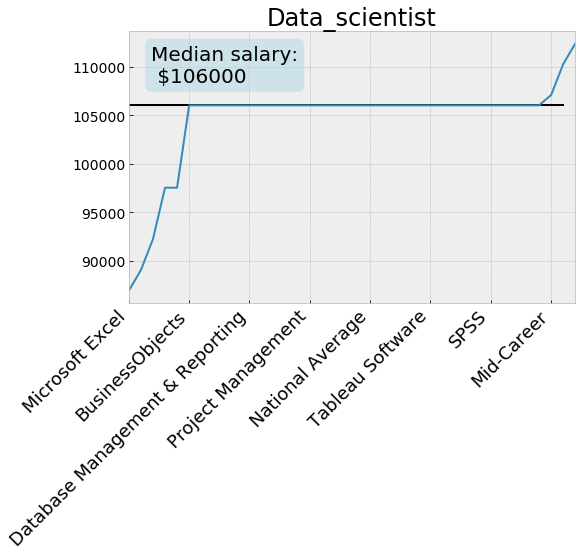

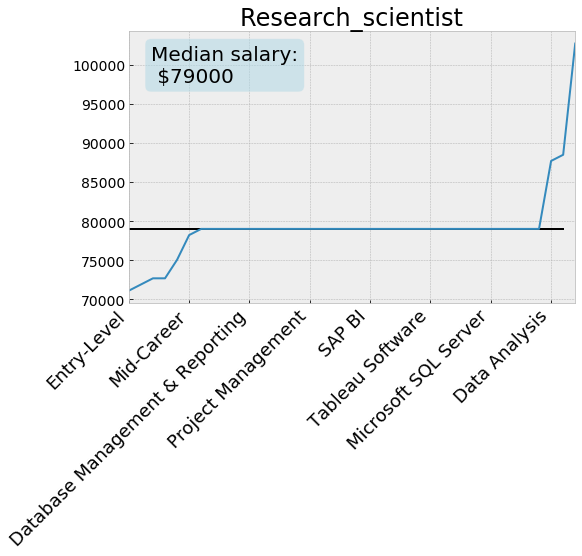

In [86]:
jobs = [x for x in clean_salaries.columns[1:]]
#clean_salaries[job][0]
for job in jobs:
    plot_salaries(clean_salaries, job)

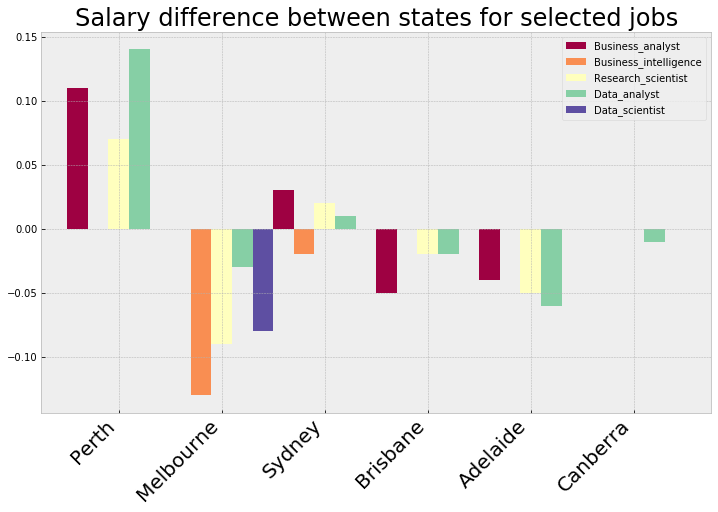

In [87]:
fig, ax = plt.subplots(figsize=(12,7))
salary_by_state.set_index('Unnamed: 0').plot(kind='bar', ax=ax, colormap='Spectral', width = 1);
plt.xticks(fontsize=20)
plt.title('Salary difference between states for selected jobs', fontsize=24);
plt.xticks(rotation=45)
plt.xlabel(' ');
for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_horizontalalignment('right')

### Can I predict the salary of an ad based on the relevant skills required for the role? 

In [92]:
keep_words = [x for x in clean_salaries['skill']]
    
keep_words.remove('National Average')

for x in keep_words:
    print ("'{}',".format(x)),

'Entry-Level', 'Microsoft Office', 'Microsoft Access', 'Microsoft Word', 'Microsoft Excel', 'Tableau Software', 'Data Analysis', 'R', 'Data Modeling', 'SAS', 'Late-Career', 'SQL', 'Microsoft SQL Server', 'SPSS', 'Experienced', 'Mid-Career', 'SAS', 'Visual Basic (VB)', 'Windows OS', 'Business Analysis', 'Business Intelligence', 'Business Process Engineering', 'BusinessObjects', 'Chemistry', 'Clinical Research', 'Cognos', 'Data Warehouse', 'Database Management & Reporting', 'Financial Analysis', 'Financial Modeling', 'Molecular Biology', 'Process Improvement', 'Project Management', 'Requirements Analysis', 'Research Analysis', 'SAP BI', 'Statistical Analysis',
